# 1 Modelling the external data
## Case a) Mixed reflectance and thermal emission, constrained EV

**Author:** Hannu Parviainen<br>
**Last edited:** 21.11.2021

Here we model the KELT-1 light curves observed with TESS (Beatty20, XX20), LBT (Beatty), and Spitzer (Beatty2019, Beatty2017) using a full phase curve model that includes the transit, secondary eclipse, thermal emission, reflection, ellipsoidal variations and Doppler boosting. 

The model is implemented by `src.priordatalpf.JointLPF`, which inherits all its functionality from `pytransit.lpf.PhaseCurveLPF`.

In this base case we don't constrain the geometric albedo or the planet's day-side flux ratio (we do this in the later cases). These two parameters should be linearly correlated since they are the main parameters affecting the eclipse depth, but it is useful to see their joint posterior.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from corner import corner
from src import JointLPF

In [4]:
lpf = JointLPF('a')

Global optimisation:   0%|          | 0/145000 [00:00<?, ?it/s]

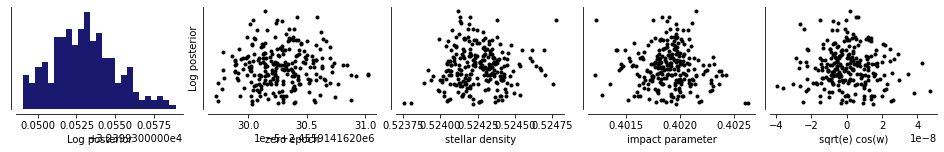

In [5]:
lpf.optimize_global(45000, 250)

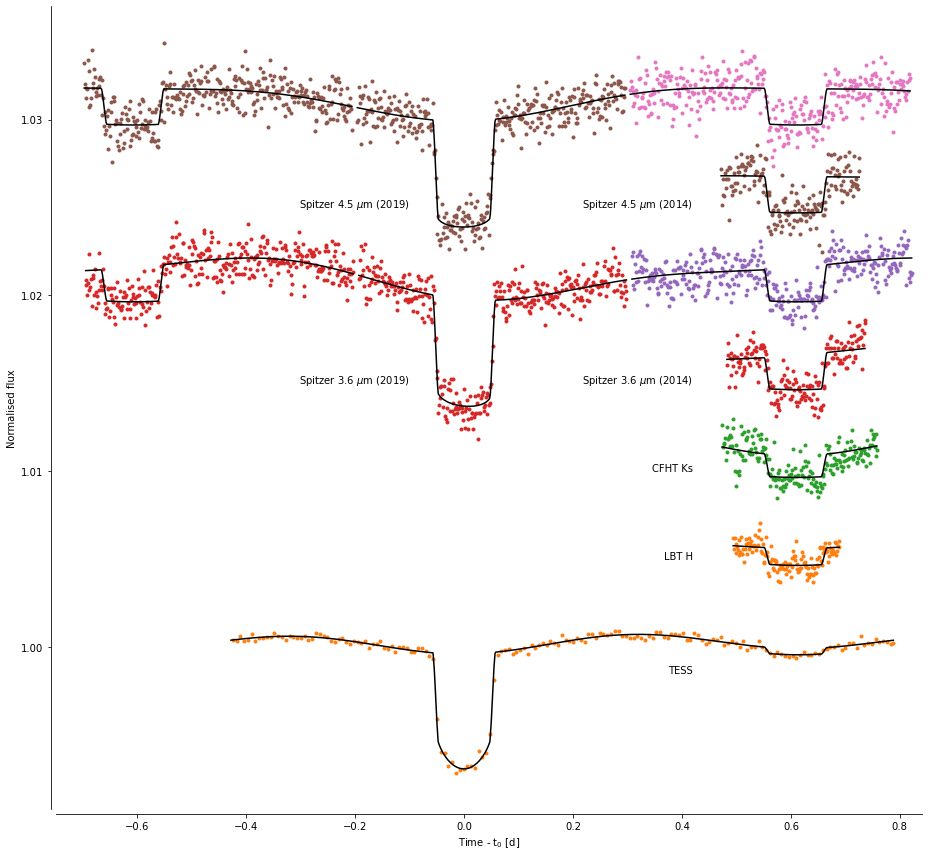

In [6]:
plot_joint_lcs(lpf);

In [7]:
lpf.sample_mcmc(25000, thin=100, repeats=25, save=True)

MCMC sampling:   0%|          | 0/25 [00:00<?, ?it/s]

Run 1/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 2/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 3/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 4/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 5/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 6/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 7/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 8/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 9/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 10/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 11/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 12/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 13/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 14/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 15/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 16/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 17/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 18/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 19/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 20/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 21/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 22/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 23/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 24/25:   0%|          | 0/25000 [00:00<?, ?it/s]

Run 25/25:   0%|          | 0/25000 [00:00<?, ?it/s]

In [8]:
df = lpf.posterior_samples(derived_parameters=False)

In [9]:
df

,tc,p,rho,b,secw,sesw,k2,oev,aev_TESS,adb_TESS,...,lm_s__0_4,lm_s__0_5,lm_s__0_6,lm_i__0,lm_s__0_1,lm_s__0_2,lm_s__0_3,lm_s__0_4,lm_s__0_5,lm_s__0_6
0,2.455914e+06,1.217494,0.649873,0.118545,-2.160611e-06,1.709060e-06,0.005670,-1.253078e-07,0.000436,0.000039,...,0.001484,-0.000941,0.000519,0.998754,0.000130,-0.000351,0.001191,0.001566,-0.000850,0.000433
1,2.455914e+06,1.217494,0.648319,0.121128,-2.062666e-06,1.703974e-06,0.005671,-1.203607e-07,0.000436,0.000039,...,0.001494,-0.000936,0.000521,0.998737,0.000041,-0.000384,0.001145,0.001558,-0.000852,0.000427
2,2.455914e+06,1.217494,0.659756,0.098071,-2.315876e-06,1.866866e-06,0.005649,-1.168425e-07,0.000434,0.000039,...,0.001420,-0.000968,0.000479,0.998827,0.000306,-0.000249,0.001222,0.001535,-0.000883,0.000422
3,2.455914e+06,1.217494,0.645139,0.126158,-2.119704e-06,1.807377e-06,0.005668,-1.130502e-07,0.000436,0.000039,...,0.001452,-0.000951,0.000491,0.998839,0.000242,-0.000260,0.001160,0.001541,-0.000879,0.000433
4,2.455914e+06,1.217494,0.649933,0.109467,-2.344343e-06,2.038301e-06,0.005654,-1.360540e-07,0.000433,0.000040,...,0.001398,-0.000977,0.000489,0.998826,0.000304,-0.000240,0.001198,0.001549,-0.000887,0.000432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62495,2.455914e+06,1.217494,0.570117,0.343250,6.515275e-07,-7.592490e-07,0.005790,6.526928e-08,0.000476,0.000049,...,0.002130,-0.000585,0.000642,0.999142,-0.000559,-0.000184,0.000304,0.001457,-0.000674,0.000515
62496,2.455914e+06,1.217494,0.561286,0.355304,5.551901e-07,-7.249049e-07,0.005792,6.081032e-08,0.000478,0.000048,...,0.002116,-0.000600,0.000646,0.999159,-0.000453,-0.000153,0.000388,0.001457,-0.000667,0.000515
62497,2.455914e+06,1.217494,0.564094,0.342958,5.201762e-07,-6.849487e-07,0.005790,6.330942e-08,0.000475,0.000049,...,0.002175,-0.000580,0.000685,0.999187,-0.000475,-0.000148,0.000326,0.001488,-0.000653,0.000539
62498,2.455914e+06,1.217494,0.559442,0.349371,7.244365e-07,-6.078059e-07,0.005791,5.841568e-08,0.000478,0.000048,...,0.002121,-0.000625,0.000660,0.999193,-0.000414,-0.000142,0.000371,0.001488,-0.000654,0.000546


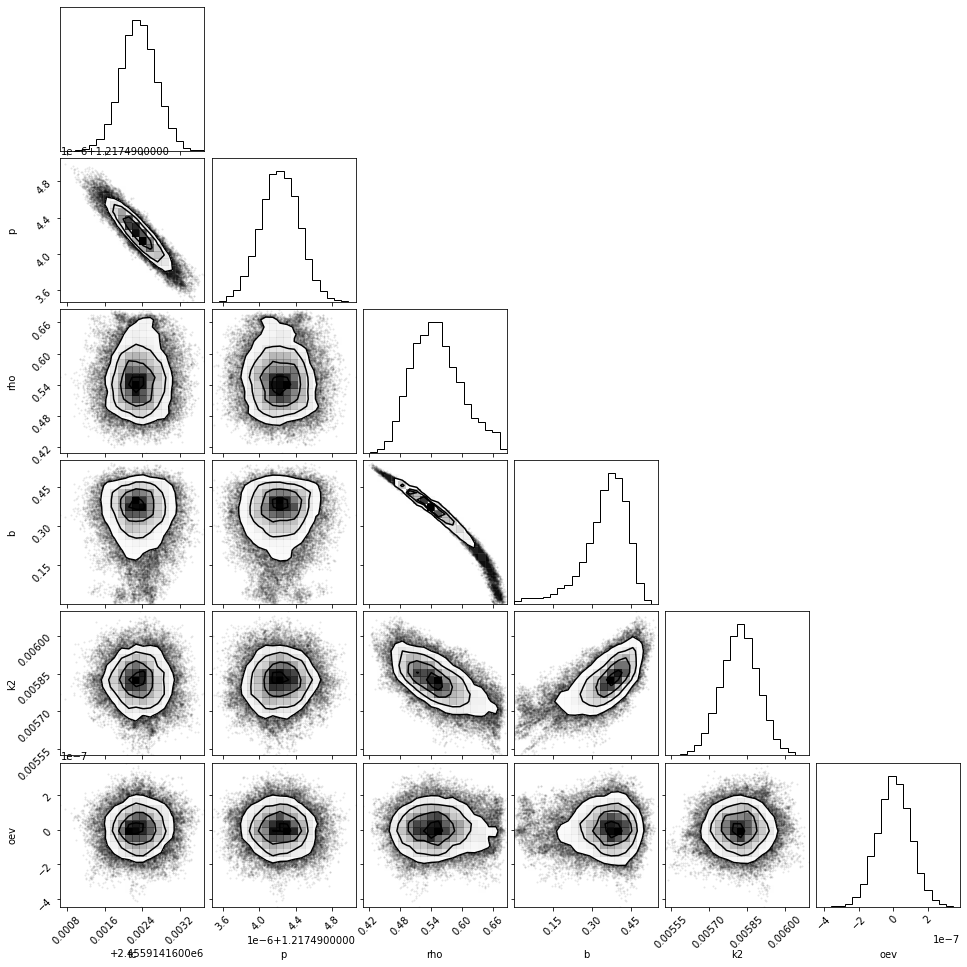

In [19]:
corner(df.iloc[:,[0,1,2,3,6,7]]);

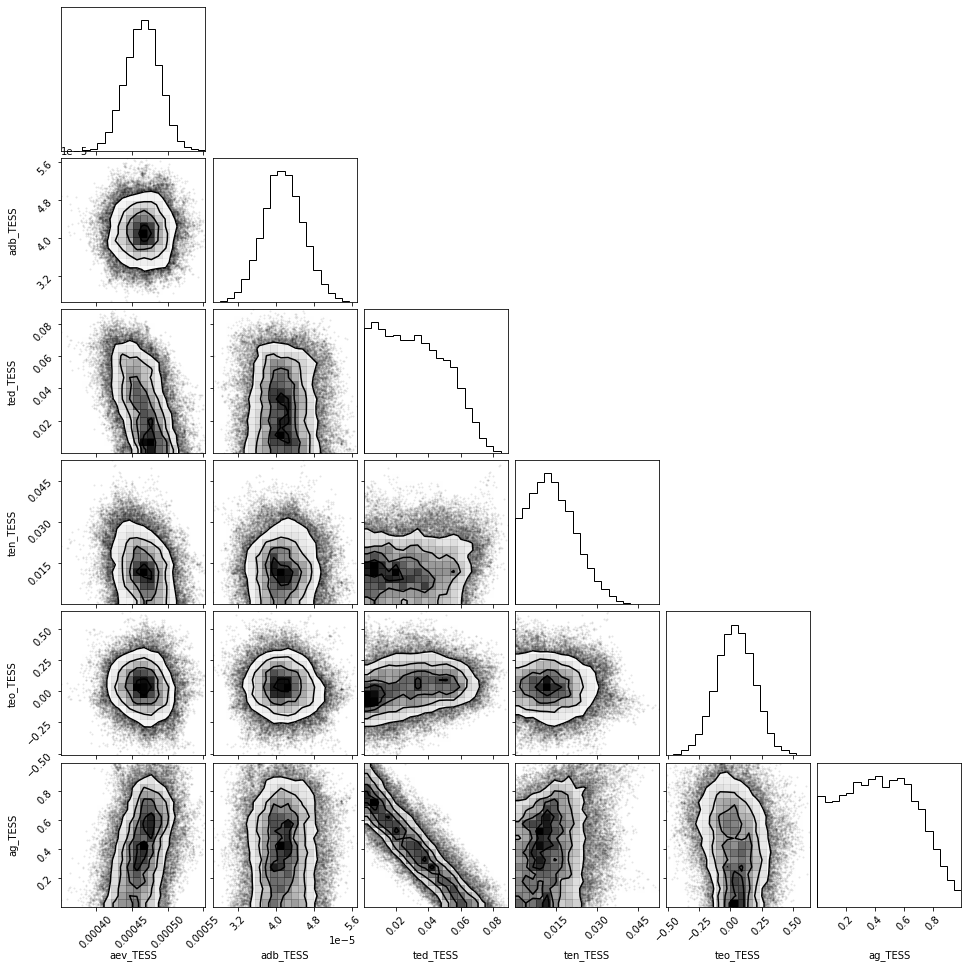

In [22]:
corner(df.iloc[:,8:14]);

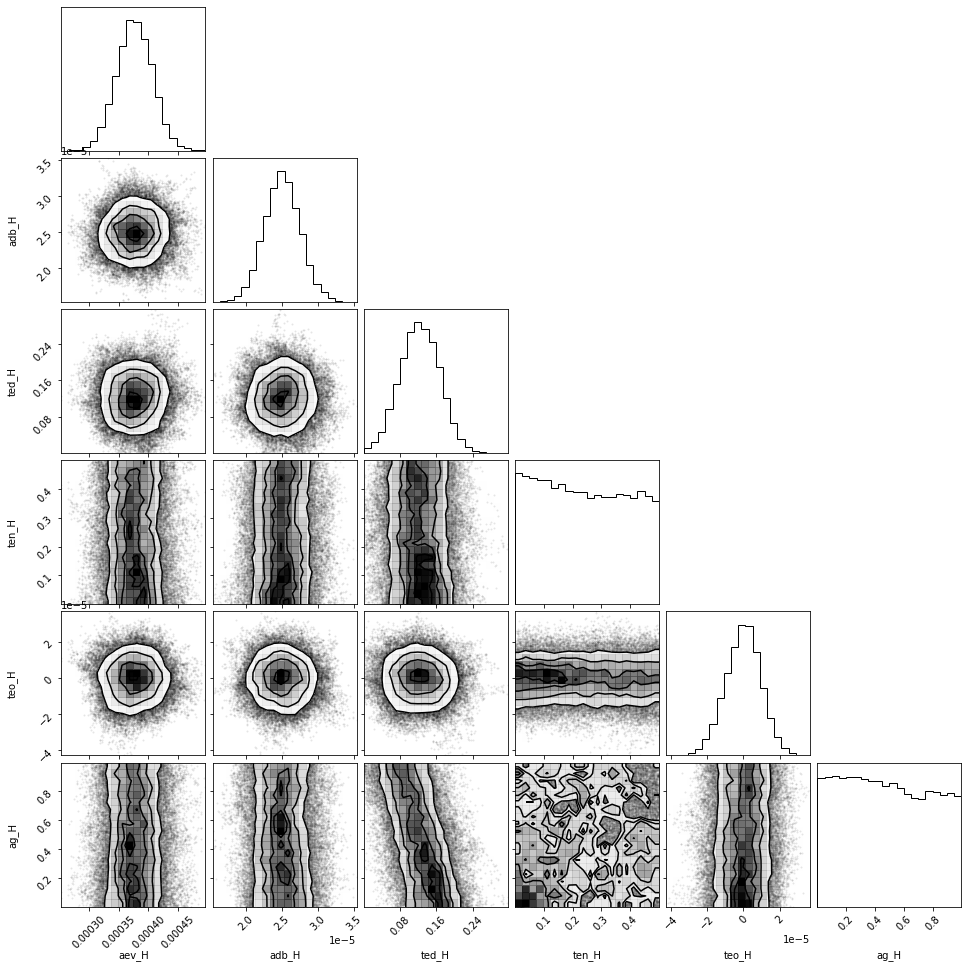

In [24]:
corner(df.iloc[:,14:20]);

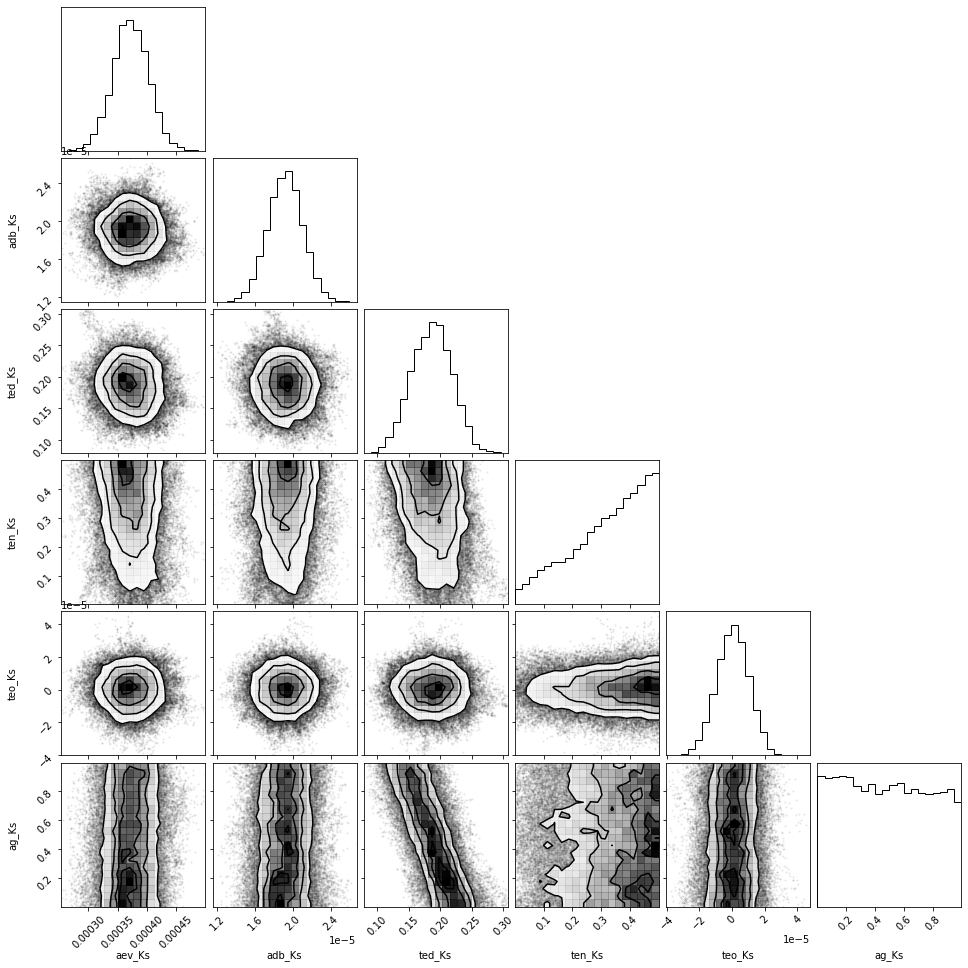

In [25]:
corner(df.iloc[:,20:26]);

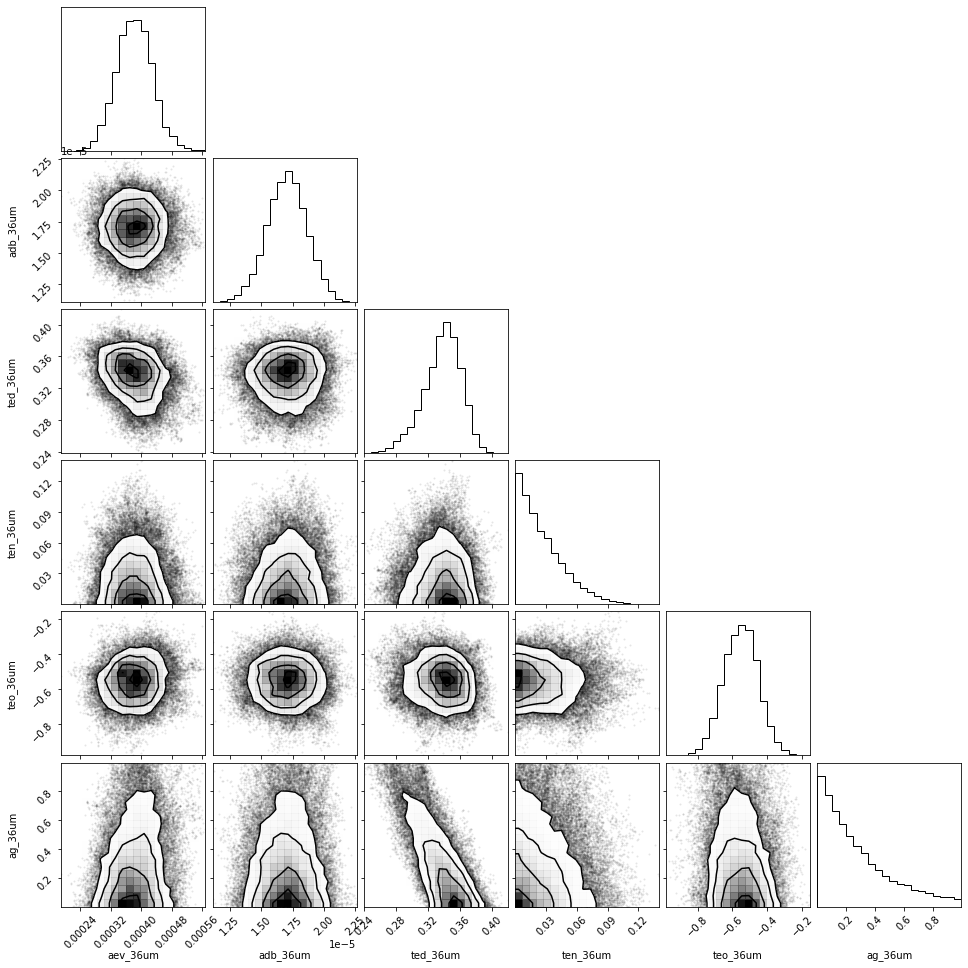

In [26]:
corner(df.iloc[:,26:32]);

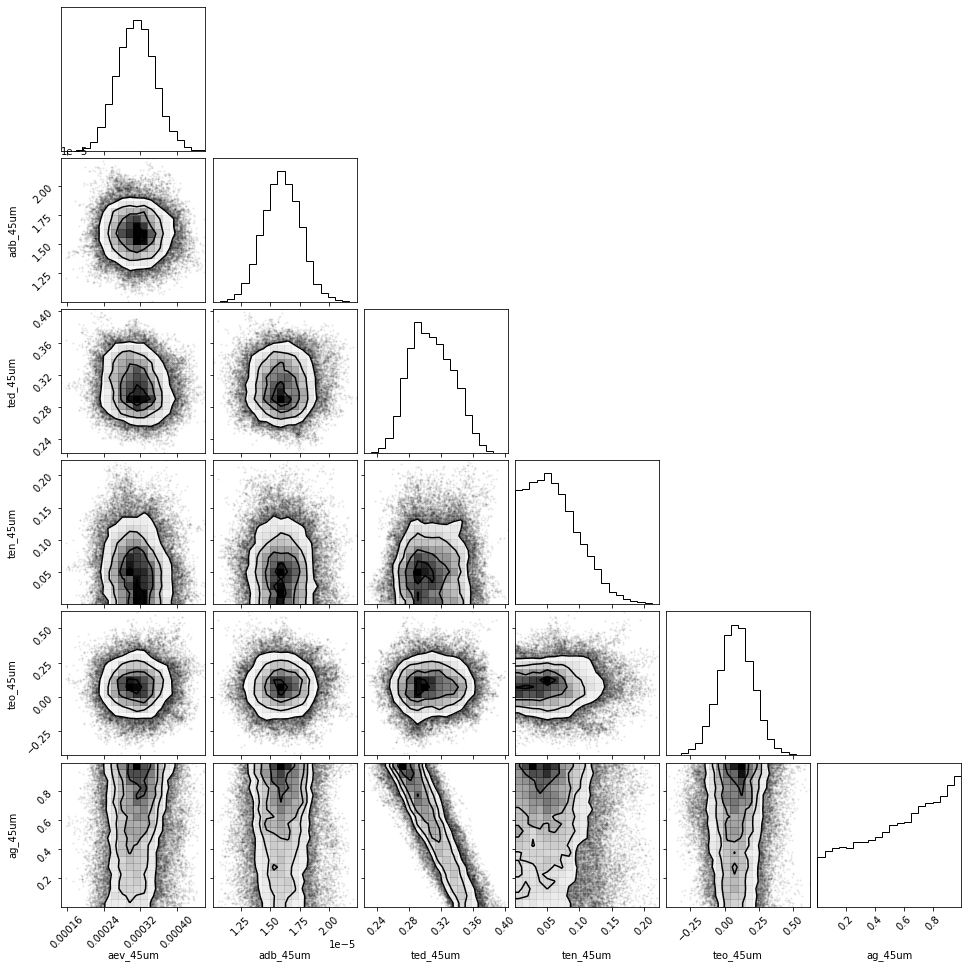

In [27]:
corner(df.iloc[:,32:38]);

---

<center>&copy 2021 Hannu Parviainen</center>